In [16]:
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import List
import os 
import numpy as np 

In [17]:
def compute_rouge_l(candidate, reference):
    m, n = len(candidate), len(reference)
    #print(m,n)
    dp_table = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if candidate[i - 1] == reference[j - 1]:
                dp_table[i][j] = dp_table[i - 1][j - 1] + 1
            else:
                dp_table[i][j] = max(dp_table[i - 1][j], dp_table[i][j - 1])
    
    return dp_table[m][n] / n

In [18]:
csv_files = [f"ft-flare-rag-{count * 10}.csv" for count in range(1,6)]


In [19]:
# Create an empty list to store DataFrames
dfs = []

# Loop through each CSV file
for csv_file in csv_files:
    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Fill null values with 'None'
    df = df.fillna('None')
    
    # Append the DataFrame to the list
    dfs.append(df)

In [20]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return filtered_tokens


In [23]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    return tokens

In [24]:
def compute_similarity_score(answer,syntheses):
    tokens_answer = preprocess_text(answer)
    tokens_syntheses = preprocess_text(syntheses)
    str_answer = ' '.join(tokens_answer)
    str_syntheses = ' '.join(tokens_syntheses)
    freqdist_answer = nltk.FreqDist(str_answer.split())
    freqdist_syntheses = nltk.FreqDist(str_syntheses.split())
    # Extract frequencies for unique tokens in both texts
    unique_tokens = set(freqdist_answer.keys()).union(freqdist_syntheses.keys())

    freq_answer = [freqdist_answer[token] for token in unique_tokens]
    freq_syntheses = [freqdist_syntheses[token] for token in unique_tokens]

    vector_answer = np.array(freq_answer).reshape(1, -1)
    vector_syntheses = np.array(freq_syntheses).reshape(1, -1)

    similarity_score = cosine_similarity(vector_answer, vector_syntheses)[0][0]

    return similarity_score

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [26]:

total_average_rouge_l_scores = []
total_average_cosine_similarity_scores  = []

num_labels = []
count = 0 
for df in dfs:

    count += 10
    num_labels.append(count)

   #df = pd.read_csv(csv_file)
    rouge_l_scores = [] 
    cosine_similarity_scores = [] 

    for idx, row in df.iterrows():
        answer = row['answer']
        syntheses = row['syntheses'] 
        print(answer,syntheses)


    
        compute_sim_score = compute_similarity_score(answer,syntheses)
        cosine_similarity_scores.append(compute_sim_score)



        
        rouge_l_score = compute_rouge_l(answer, syntheses)
        rouge_l_scores.append(rouge_l_score)
       

    total_average_cosine_similarity_score = sum(cosine_similarity_scores) / len(cosine_similarity_scores)
    total_average_cosine_similarity_scores.append(total_average_cosine_similarity_score)


    total_average_rouge_l_score = sum(rouge_l_scores)/len(rouge_l_scores)
    total_average_rouge_l_scores.append(total_average_rouge_l_score)

$22,500.00 The total amount of the invoice is $500. 
#0001 The invoice number is a unique identifier for a specific invoice. It is typically located at the top of the invoice and is used for tracking and reference purposes. Do you have a specific invoice number in mind? 
•Front End Engineering Service;
•Back End Engineering Service;
•Quality Assurance Manager A list of the items being purchased is a collection of all the products or goods that are being bought by a customer. It can include anything from groceries, clothes, electronics, to household items. Is there a specific list of items you are looking for? 
Bia Hermes The name of the contact for question is not specified. Please provide a name. 
#1000 The PO number is a unique identifier for a purchase order. It is typically assigned by the buyer and used to track the order throughout the purchasing process. Do you have a specific PO number in mind? 
within 30 days of 01/01/2022 The payment is due on the date specified in your contr

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


Text(0.5, 1.0, ' After Fine-Tuning Cosine Similarity Score')

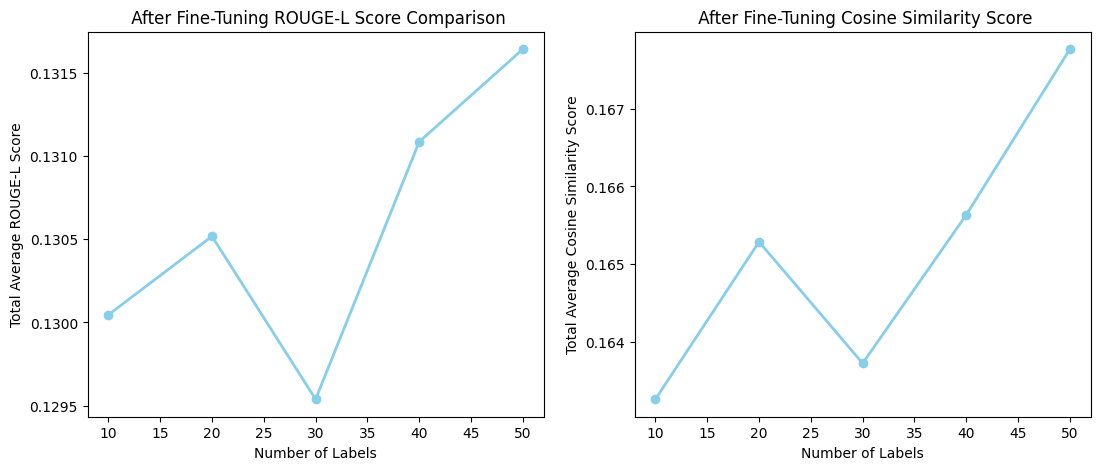

In [28]:
plt.figure(figsize=(20, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(num_labels, total_average_rouge_l_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)

plt.xlabel('Number of Labels')
plt.ylabel('Total Average ROUGE-L Score')
plt.title(' After Fine-Tuning ROUGE-L Score Comparison')

plt.subplot(1, 3, 2)
plt.plot(num_labels, total_average_cosine_similarity_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.xlabel('Number of Labels')
plt.ylabel('Total Average Cosine Similarity Score')
plt.title(' After Fine-Tuning Cosine Similarity Score')
